# F1: Toy example rank-based empirical p-value

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/spellegrini/miniconda3/envs/3d_clustering/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def get_rank_toy_dist(mean, sd, n, max_i=5000):
    
    rank = np.random.normal(mean, std_dev, n)
    i = 0
    while sum(rank < 0) > 0:
        rank = np.random.normal(mean, std_dev, n)
        i += 1
        if i > max_i:
            print("Max iter reached.")
            return None
    
    return rank


def get_rank_toy_dist(l, m, n, max_i=5000):
    
    rank = np.random.uniform(l, m, n)
    i = 0
    while sum(rank < 0) > 0:
        rank = np.random.normal(mean, std_dev, n)
        i += 1
        if i > max_i:
            print("Max iter reached.")
            return None
    
    return rank

In [3]:
obs_rank = [0.9, 0.8, 0.72, 0.7, 0.68, 0.04]

In [4]:
rank1 = get_rank_toy_dist(l=0.25, m=0.58, n=30)
rank2 = get_rank_toy_dist(l=0.2, m=0.4, n=30)
rank3 = get_rank_toy_dist(l=0.1, m=0.35, n=30)
rank4 = get_rank_toy_dist(l=0.06, m=0.25, n=30)
rank5 = get_rank_toy_dist(l=0.05, m=0.15, n=30)
rank6 = get_rank_toy_dist(l=0, m=0.1, n=30)

rank1 = np.append(rank1, [0.84, 0.59, 0.52, 0.54, 0.65, 0.78])
rank2 = np.append(rank2, [0.36, 0.48, 0.6, 0.55, 0.68, 0.83])
rank3 = np.append(rank3, [0.27, 0.45, 0.63, 0.57, 0.735, 0.79])
rank4 = np.append(rank4, [0.4, 0.6, 0.76, 0.47, 0.71, 0.74])
rank5 = np.append(rank5, [0.41, 0.29, 0.55, 0.69, 0.72, 0.73])
rank6 = np.append(rank6, [0.06, 0.27, 0.16, 0.6, 0.4, 0.5])

ranks = [rank1, rank2, rank3, rank4, rank5, rank6]
sim_ranks = pd.DataFrame({f"R{i}" : ranks[i-1] for i in range(1, 7)})

/tmp/jobs/spellegrini/10455941/ipykernel_1830/3101764754.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  sim_patch = plt.scatter([], [], c="#629c49", s=35, label="Simulated", ec="k")
/tmp/jobs/spellegrini/10455941/ipykernel_1830/3101764754.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  obs_patch = plt.scatter([], [], c="#FF9900", s=70, label="Observed", ec="k")


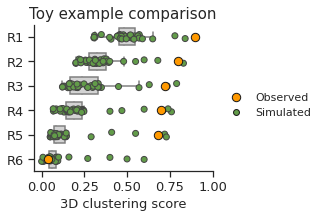

In [5]:
# Create a box plot with dots on top
plt.figure(figsize=(3.2, 2.7))
sns.set(style="ticks", rc={'xtick.labelsize': 13, 'ytick.labelsize': 13})

# Create a box plot with dots on top
sns.boxplot(data=sim_ranks, width=0.7, showfliers=False, orient="h", color="lightgray", zorder=0)
sns.stripplot(data=sim_ranks, jitter=True, palette=["#629c49"], size=6, marker="o", 
              orient="h", linewidth=1, label="Simulated", zorder=1)
plt.scatter(x=obs_rank, y=[f"R{i}" for i in range(1, 7)], zorder=3, color="#FF9900", ec="k", s=70, label="Observed")

sim_patch = plt.scatter([], [], c="#629c49", s=35, label="Simulated", ec="k")
obs_patch = plt.scatter([], [], c="#FF9900", s=70, label="Observed", ec="k")
plt.legend(handles=[obs_patch ,sim_patch], loc="lower center", bbox_to_anchor=(1.31, 0.3), frameon=False)

plt.xticks(np.arange(0, 1.1, 0.25))
plt.title("Toy example comparison", fontsize=15)
plt.xlabel("3D clustering score", fontsize=13)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("../../figures_and_tables/main/f1/f1.toy_example.png", dpi=300, bbox_inches='tight')
plt.show()

## Scoring function

In [236]:
import numpy as np
import pandas as pd
from scipy import stats


def get_anomaly_score(vec_mut_in_vol, gene_mut, vec_vol_miss_mut_prob):          
    """
    Compute a metric that scores the anomaly of observing a certain 
    number of mutations in the volume of a residue.
    It takes into account the volume and the mutation rate of the codon 
    of each residue within that volume.
    
    Score: loglik equal or larger mut_count / loglik(N)
    """
    
    den = stats.binom.logpmf(k=gene_mut, n=gene_mut, p=vec_vol_miss_mut_prob)

    return stats.binom.logsf(k=vec_mut_in_vol-1, n=gene_mut, p=vec_vol_miss_mut_prob) / den

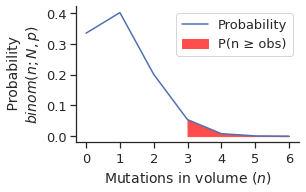

In [261]:
s = 2
N=6
df = pd.DataFrame([(i, stats.binom.pmf(k=i, n=N, p=1/N)) for i in range(N+1)], columns=["Mut_in_vol", "Probability"])

df.plot(x="Mut_in_vol", y="Probability", figsize=(4, 2.5))
plt.fill_between(range(s+1, N+1), df["Probability"][s+1:], np.repeat(0, N-s), color="#ff4d4d", label="P(n ≥ obs)")

# Legend
handles, labels = plt.gca().get_legend_handles_labels()


plt.ylabel("Prob of $\it{s}$ mut hit the volume\n$\it{P(s; N=10, p=0.1)}$", fontsize=14)
plt.ylabel(" Probability\n$\it{binom(n; N, p)}$", fontsize=14)
plt.xlabel("Mutations in volume ($\it{n}$)", fontsize=14)
plt.xticks(range(len(df)), fontsize=13)
plt.yticks(np.arange(0, 0.5, 0.1), fontsize=13)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(fontsize=13)
# plt.savefig('anomaly_score_6.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()